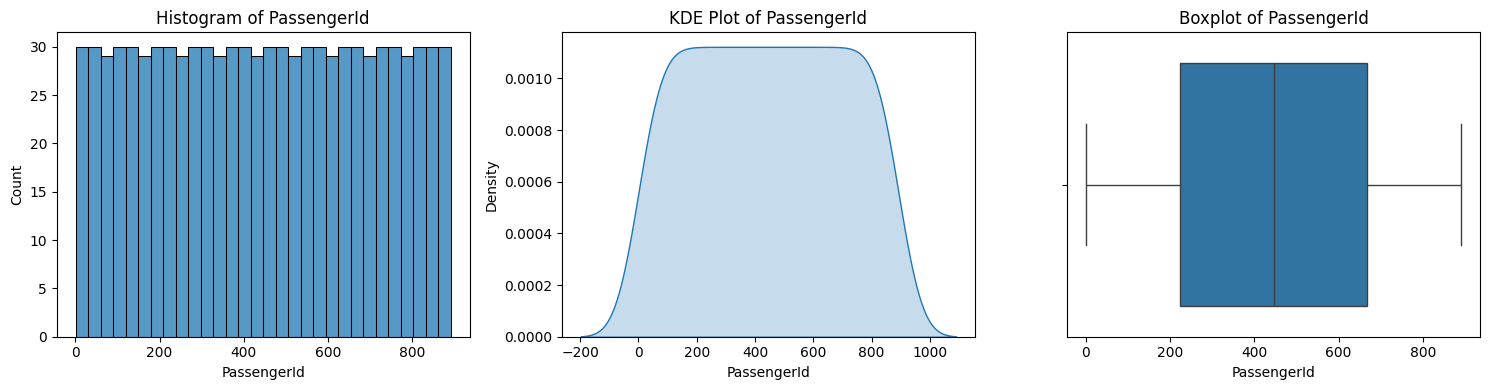

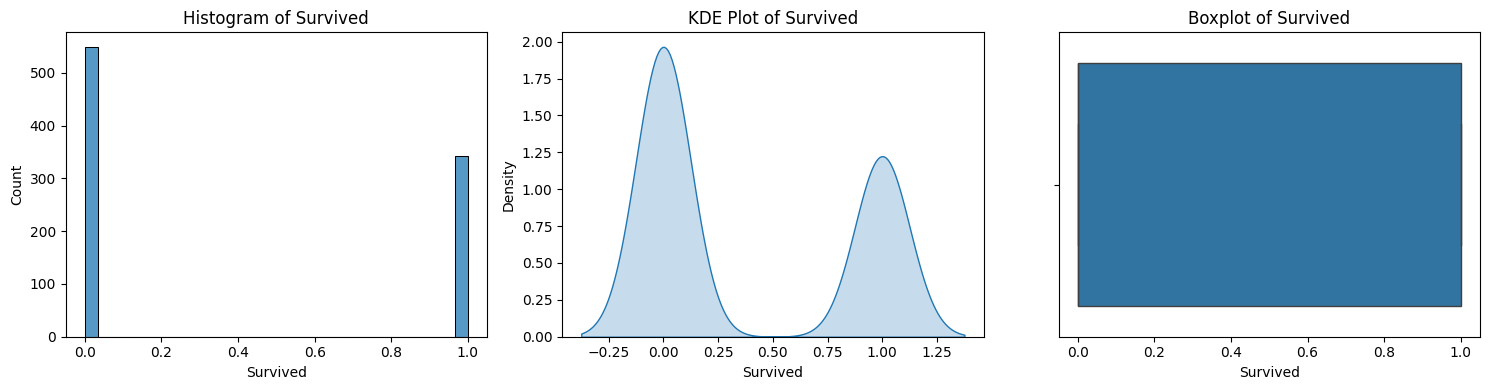

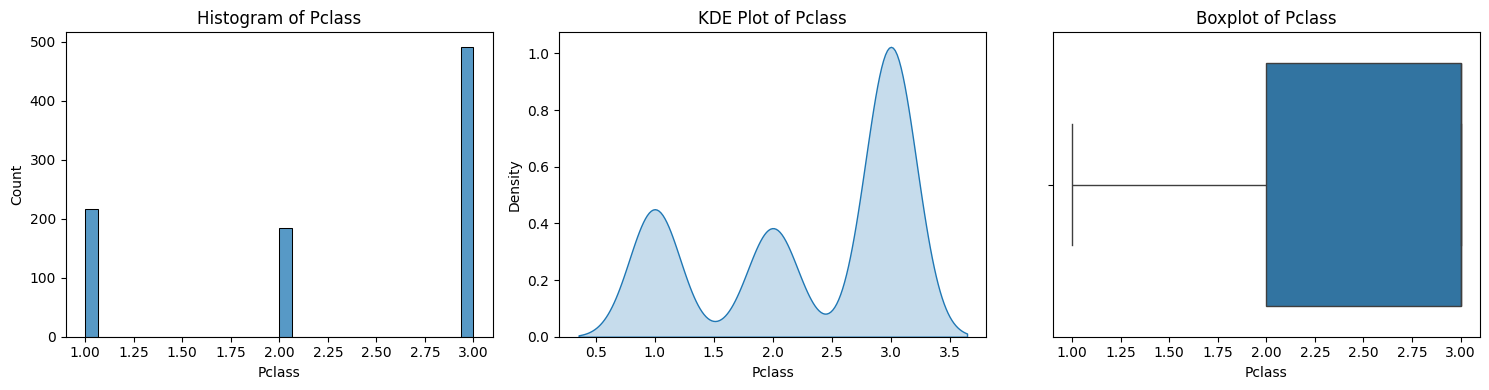

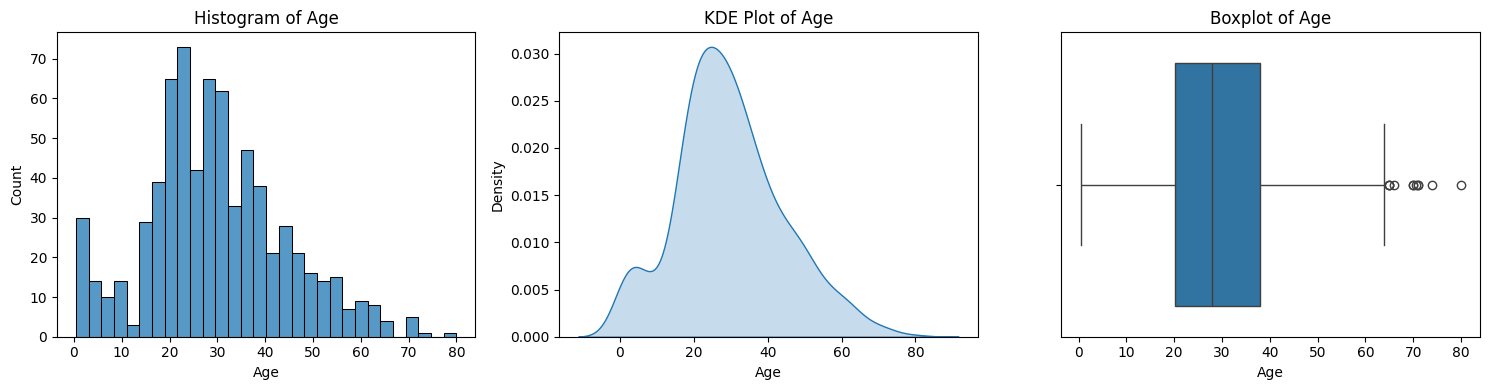

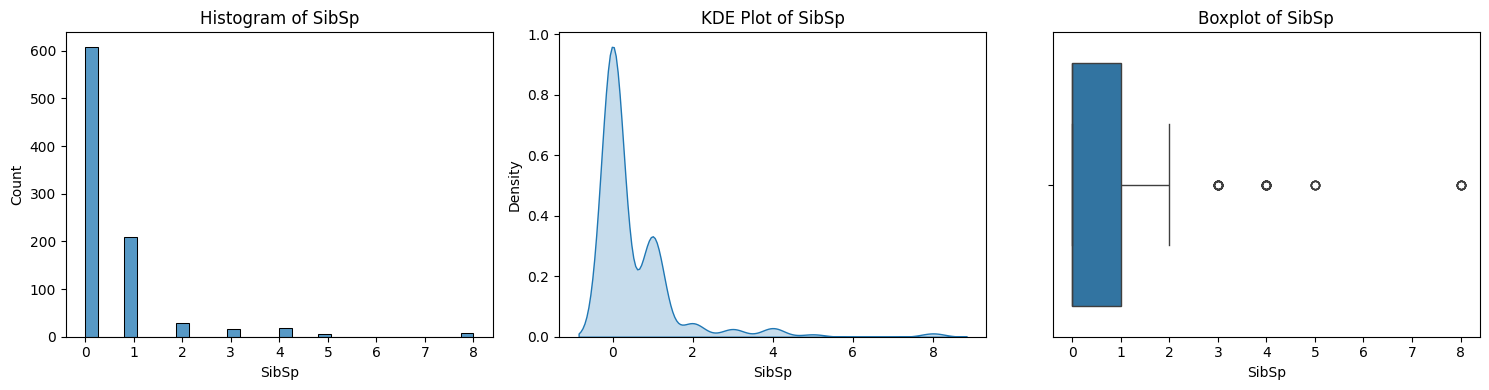

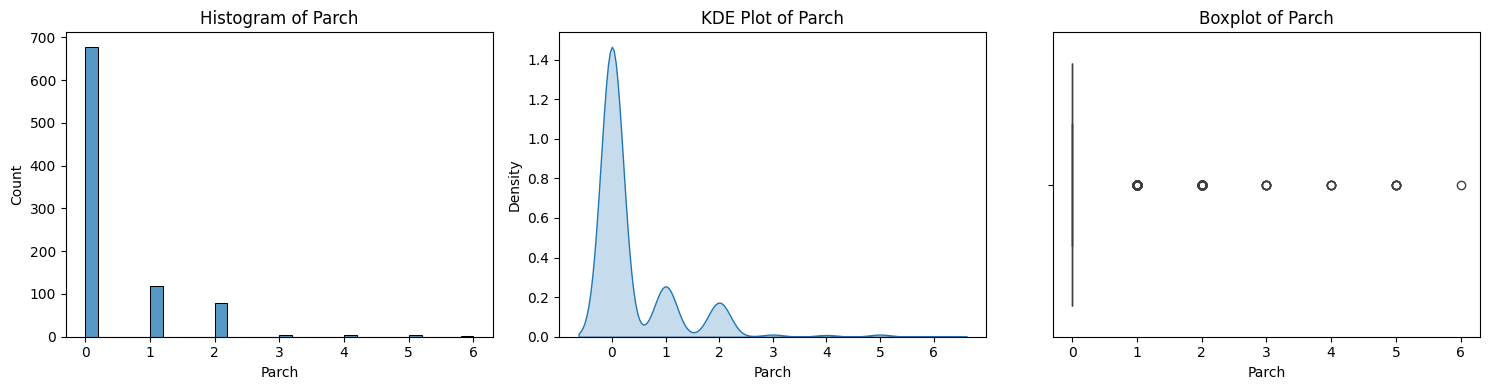

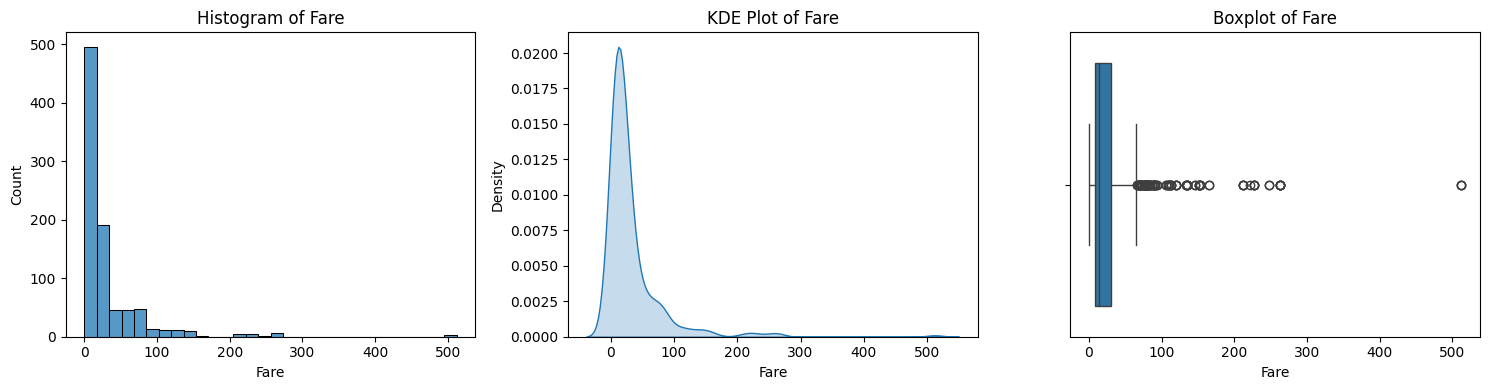

In [1]:
import sys
sys.path.append('../src')
from visualize import plot_distribution
import pandas as pd

df = pd.read_csv('../data/raw/Titanic_dataset.csv')

numeric_cols = df.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    plot_distribution(df, col)


In [5]:
skew_values = df.select_dtypes(include = 'number').skew()
kurt_values = df.select_dtypes(include = 'number').kurt()

summary = pd.DataFrame({
    'Skewness' : skew_values,
    'kurtosis' : kurt_values
})

summary

,Skewness,kurtosis
PassengerId,0.000000,-1.200000
Survived,0.478523,-1.775005
Pclass,-0.630548,-1.280015
Age,0.389108,0.178274
SibSp,3.695352,17.880420
Parch,2.749117,9.778125
Fare,4.787317,33.398141


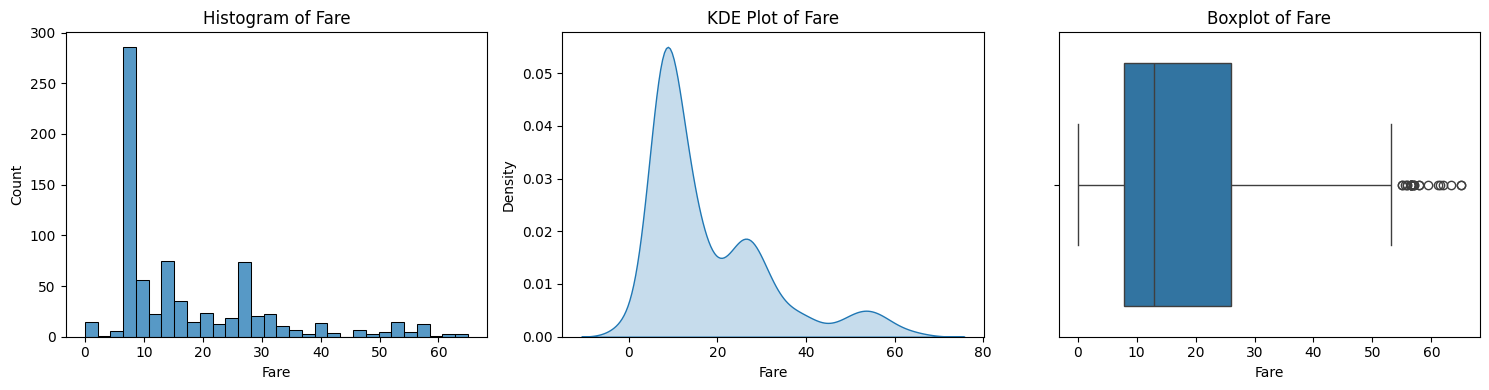

In [4]:
from clean_data import remove_outkliers_iqr

filltered_fare = remove_outkliers_iqr(df, 'Fare')
plot_distribution(filltered_fare, 'Fare')

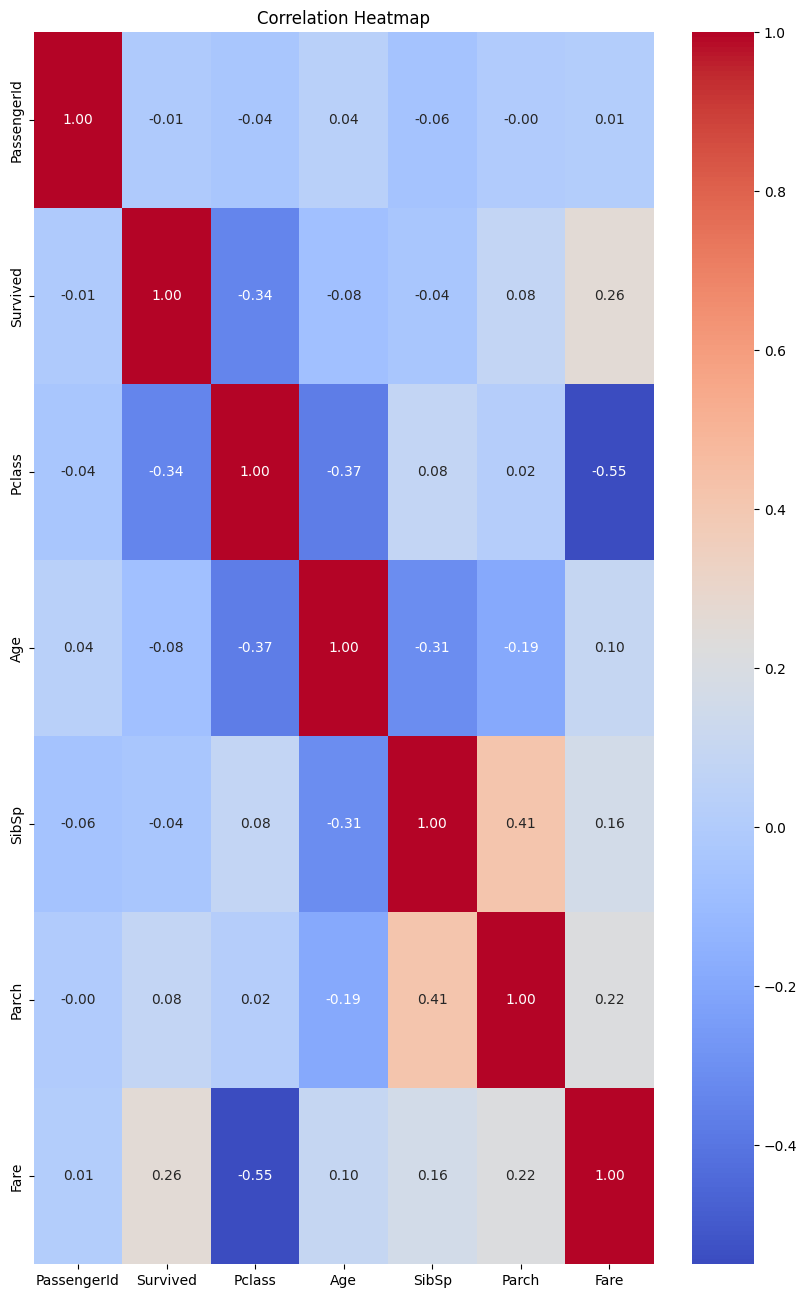

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(include = 'number').corr()

plt.figure(figsize =(10,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt ='.2f')
plt.title("Correlation Heatmap")
plt.show()